### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

- With 79 explanatory variables describing (almost) every aspect of residential homes, build a machine learning model to predict the price of a house
- Dataset Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [67]:
round(df.describe(),2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


In [68]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
numerical = [var for var in df.columns if df[var].dtype != 'O']

In [69]:
# Count the number of  null occurences of each categorical variable
print(f" Total categorical variables are : {len(categorical)}")
for var in df[categorical]:
    print(f" {df[var].name} : {df[var].isnull().sum()}")

 Total categorical variables are : 43
 MSZoning : 0
 Street : 0
 Alley : 1369
 LotShape : 0
 LandContour : 0
 Utilities : 0
 LotConfig : 0
 LandSlope : 0
 Neighborhood : 0
 Condition1 : 0
 Condition2 : 0
 BldgType : 0
 HouseStyle : 0
 RoofStyle : 0
 RoofMatl : 0
 Exterior1st : 0
 Exterior2nd : 0
 MasVnrType : 872
 ExterQual : 0
 ExterCond : 0
 Foundation : 0
 BsmtQual : 37
 BsmtCond : 37
 BsmtExposure : 38
 BsmtFinType1 : 37
 BsmtFinType2 : 38
 Heating : 0
 HeatingQC : 0
 CentralAir : 0
 Electrical : 1
 KitchenQual : 0
 Functional : 0
 FireplaceQu : 690
 GarageType : 81
 GarageFinish : 81
 GarageQual : 81
 GarageCond : 81
 PavedDrive : 0
 PoolQC : 1453
 Fence : 1179
 MiscFeature : 1406
 SaleType : 0
 SaleCondition : 0


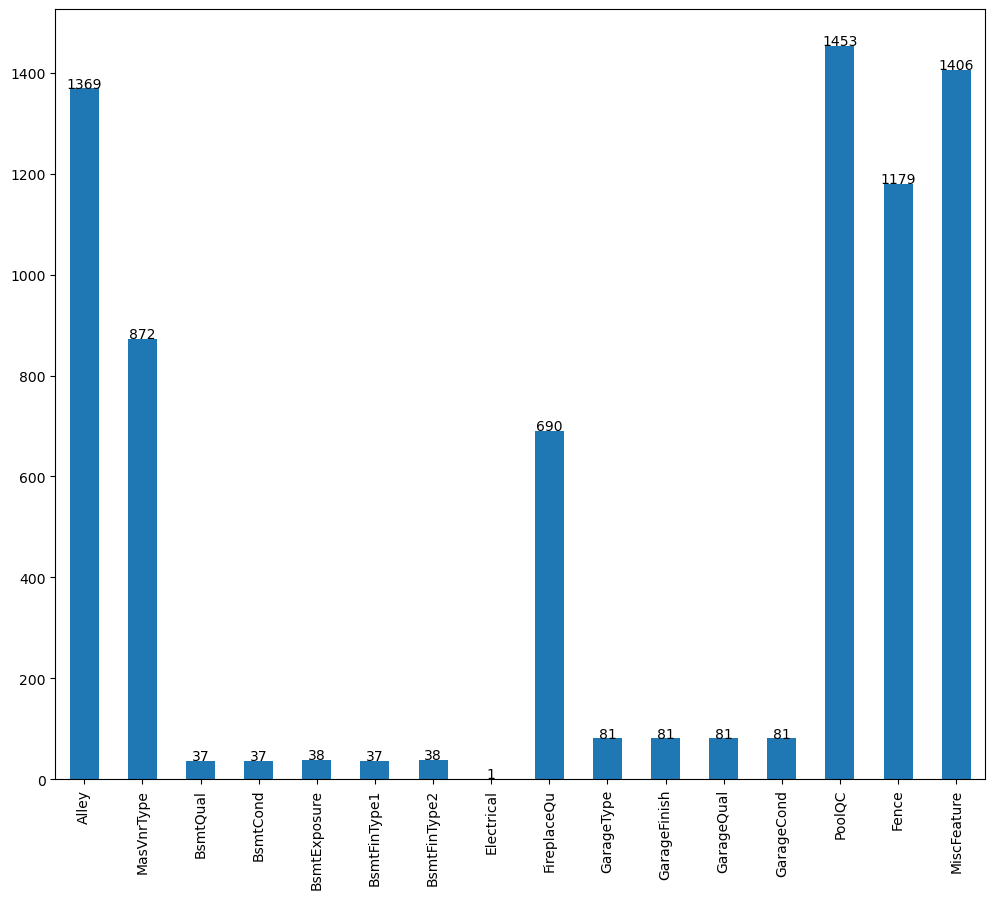

In [70]:
# visualize the null values in categorical
null_counts = df[categorical].isnull().sum()
categorical_nulls = null_counts[null_counts > 0]
plt.figure(figsize=(12,10))
categorical_nulls.plot.bar()
for var, value in enumerate(categorical_nulls):
    plt.text(var, value+1, str(value), ha='center')
plt.show()

In [71]:
print(f"Total numerical variables are : {len(numerical)}")
for var in df[numerical]:
    print(f"{df[var].name} : {df[var].isnull().sum()}")

Total numerical variables are : 38
Id : 0
MSSubClass : 0
LotFrontage : 259
LotArea : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
MasVnrArea : 8
BsmtFinSF1 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
TotRmsAbvGrd : 0
Fireplaces : 0
GarageYrBlt : 81
GarageCars : 0
GarageArea : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPorch : 0
ScreenPorch : 0
PoolArea : 0
MiscVal : 0
MoSold : 0
YrSold : 0
SalePrice : 0


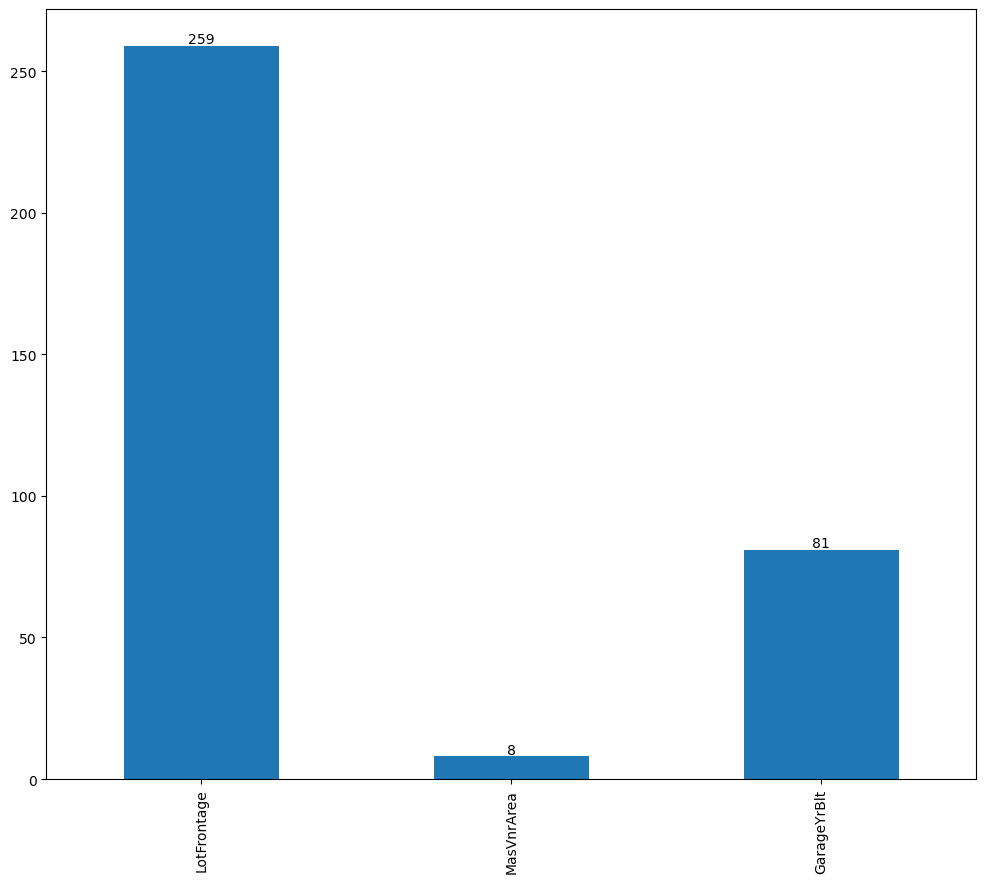

In [72]:
# visualize the null values in categorical
null_counts = df[numerical].isnull().sum()
numerical_nulls = null_counts[null_counts > 0]
plt.figure(figsize=(12,10))
numerical_nulls.plot.bar()
for var, value in enumerate(numerical_nulls):
    plt.text(var, value+1, str(value), ha='center')
plt.show()

In [73]:
# Impute the missing values in categorical and numerical using mode and mean 
for var in categorical:
    df[var].fillna(df[var].mode()[0],inplace=True)

for var in numerical:
    df[var].fillna(df[var].mean(), inplace=True)

<Axes: >

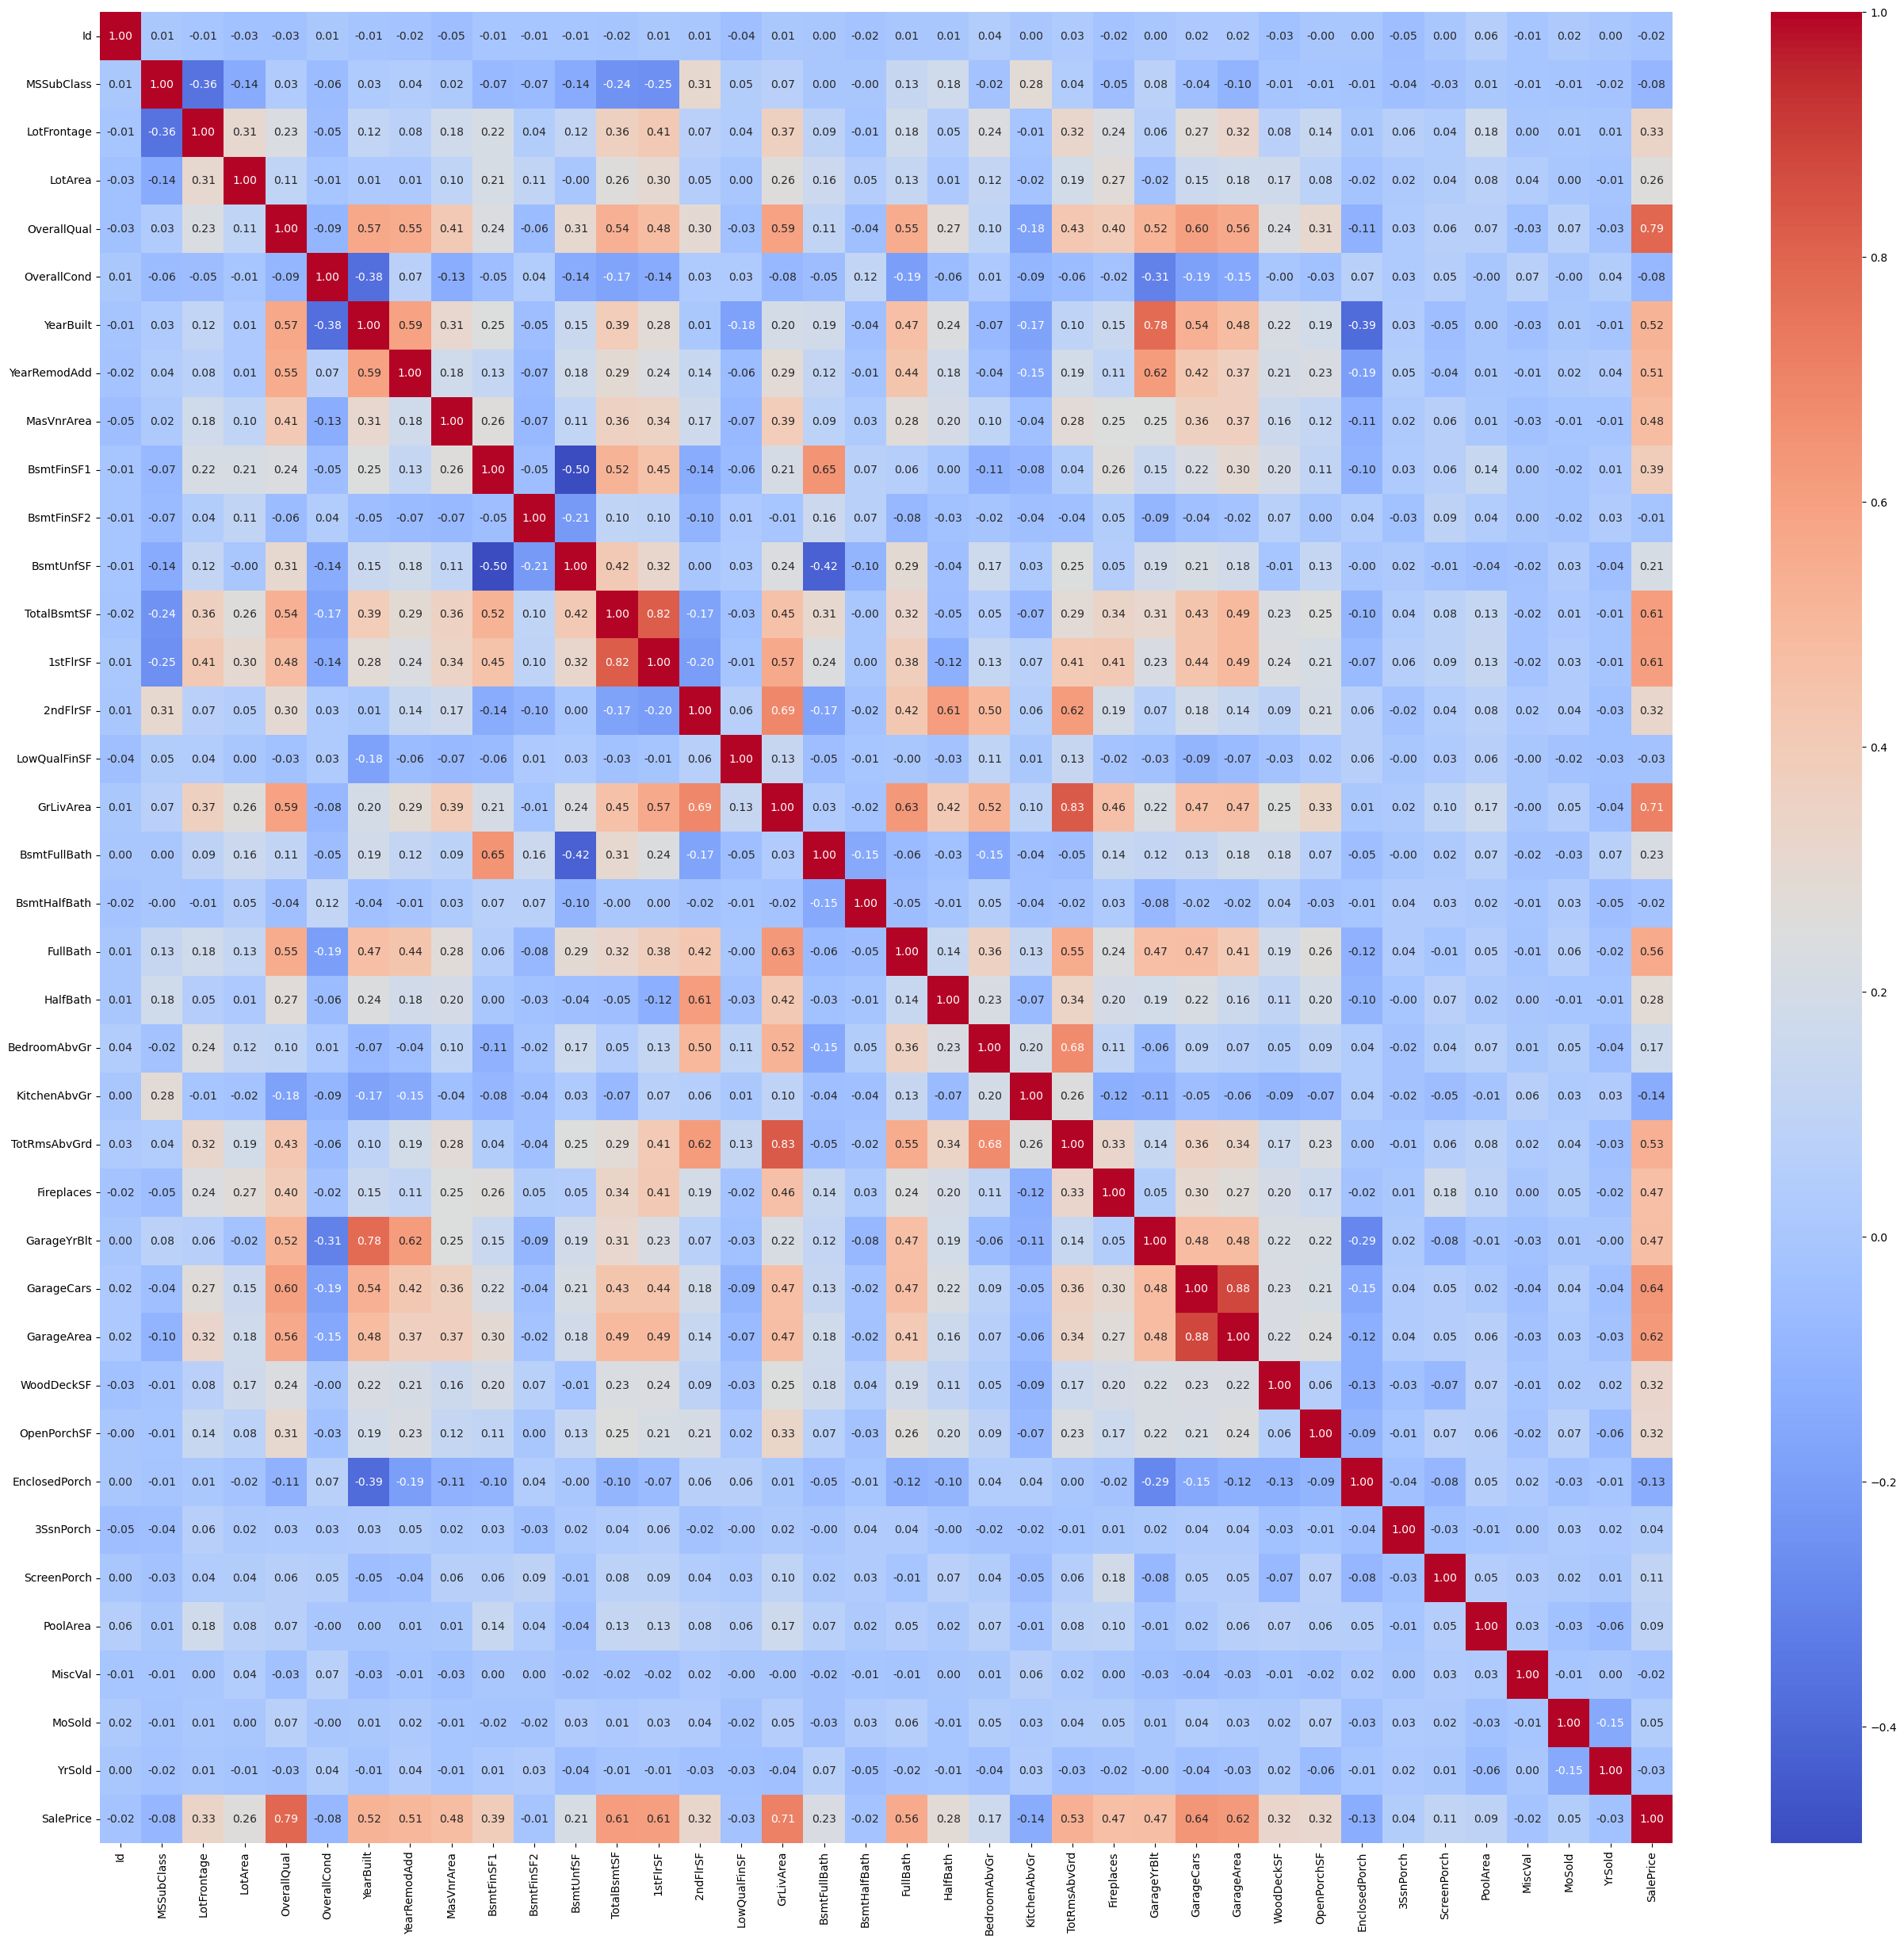

In [74]:
plt.figure(figsize=(32,30))
sns.heatmap(df[numerical].corr(), annot=True, fmt='.2f', linecolor='blue', cmap='coolwarm' )

In [75]:
for c in categorical:
    print(f"{c} : {df[c].value_counts()}")

MSZoning : MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street : Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley : Alley
Grvl    1419
Pave      41
Name: count, dtype: int64
LotShape : LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour : LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities : Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig : LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope : LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood : Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR 

In [76]:
for n in numerical:
       print(f"{n} : {df[n].value_counts(bins=10)}")

Id : Id
(-0.46, 146.9]      146
(146.9, 292.8]      146
(292.8, 438.7]      146
(438.7, 584.6]      146
(584.6, 730.5]      146
(730.5, 876.4]      146
(876.4, 1022.3]     146
(1022.3, 1168.2]    146
(1168.2, 1314.1]    146
(1314.1, 1460.0]    146
Name: count, dtype: int64
MSSubClass : MSSubClass
(19.828999999999997, 37.0]    605
(54.0, 71.0]                  359
(37.0, 54.0]                  160
(71.0, 88.0]                   94
(105.0, 122.0]                 87
(156.0, 173.0]                 63
(88.0, 105.0]                  52
(173.0, 190.0]                 40
(122.0, 139.0]                  0
(139.0, 156.0]                  0
Name: count, dtype: int64
LotFrontage : LotFrontage
(50.2, 79.4]                  902
(79.4, 108.6]                 298
(20.706999999999997, 50.2]    205
(108.6, 137.8]                 40
(137.8, 167.0]                  9
(167.0, 196.2]                  4
(283.8, 313.0]                  2
(196.2, 225.4]                  0
(225.4, 254.6]                  0
(254

In [77]:
# Estimate the correlation between SalesPrice and other numerical variables
sale_price_corr = df[numerical].corr()['SalePrice']
print(f'{sale_price_corr.sort_values(ascending=True)}')


KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.334901
BsmtFinSF1       0.386420
Fireplaces       0.466929
GarageYrBlt      0.470177
MasVnrArea       0.475241
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

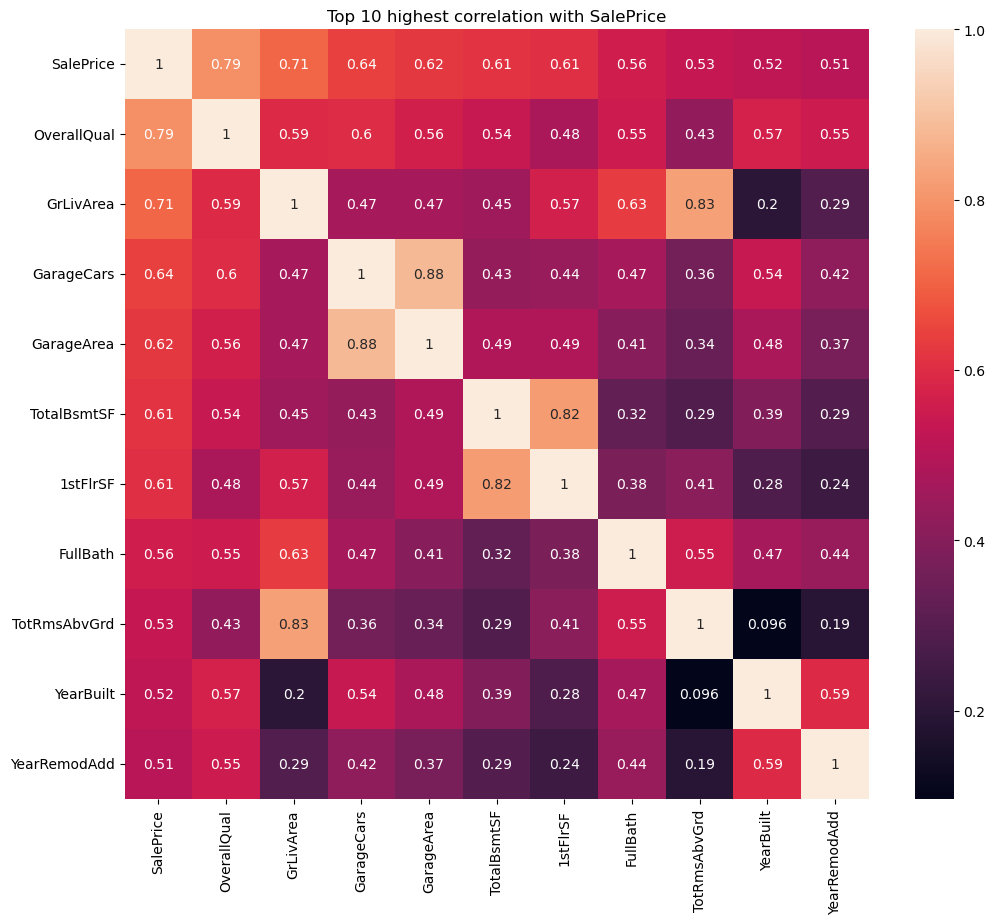

In [78]:
# Get the top 10 highest correlation values with 'SalePrice'
top_n_corr_salesprice = df[numerical].corr()['SalePrice'].nlargest(11)
# Filter numerical variables to include only top correlations
top_n_corr_matrix = df[numerical].corr().loc[top_n_corr_salesprice.index, top_n_corr_salesprice.index]
plt.figure(figsize=(12,10))
sns.heatmap(top_n_corr_matrix,annot=True)
plt.title('Top 10 highest correlation with SalePrice')
plt.show()

<Axes: xlabel='SaleType', ylabel='SalePrice'>

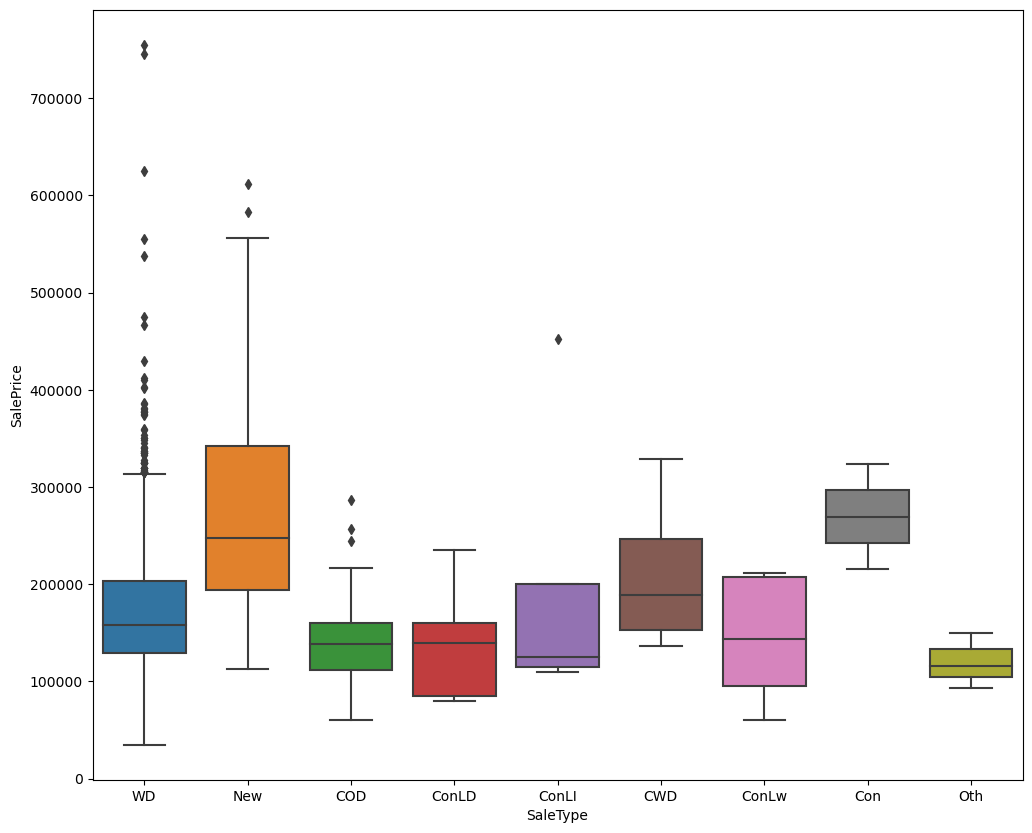

In [79]:
plt.figure(figsize=(12,10))
sns.boxplot(x=df['SaleType'],y=df['SalePrice'])

In [80]:
from sklearn.model_selection import train_test_split

df = df[categorical + numerical]
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, random_state=100)

In [81]:
X_train.shape, X_test.shape

((1021, 80), (438, 80))

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the training dataset
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

# Identify categorical and numerical columns
categorical = [var for var in df_train.columns if df_train[var].dtype == 'O']
numerical = [var for var in df_train.columns if df_train[var].dtype != 'O' and var != 'SalePrice']

# Impute and scale numerical features
imputer_num = SimpleImputer(strategy='median')
scaler = StandardScaler()
df_train[numerical] = imputer_num.fit_transform(df_train[numerical])
df_train[numerical] = scaler.fit_transform(df_train[numerical])

# Impute and encode categorical features
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

df_train[categorical] = imputer_cat.fit_transform(df_train[categorical])
encoded_categorical = encoder.fit_transform(df_train[categorical])

# Combine numerical and encoded categorical features
X = np.hstack((df_train[numerical], encoded_categorical))
y = df_train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

# Load the test dataset for prediction
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

# Preprocess the test data
df_test[numerical] = imputer_num.transform(df_test[numerical])
df_test[numerical] = scaler.transform(df_test[numerical])
df_test[categorical] = imputer_cat.transform(df_test[categorical])
encoded_categorical_test = encoder.transform(df_test[categorical])

# Combine numerical and encoded categorical features
X_submission = np.hstack((df_test[numerical], encoded_categorical_test))

# Make predictions on the test set
predictions = model.predict(X_submission)

# Prepare the submission DataFrame
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


R² score: -4.32324400707414e+17
Submission file created successfully!


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 2nd - Approach

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [85]:
# Load the training dataset
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

In [86]:
# Identify categorical and numerical columns
categorical = [var for var in df_train.columns if df_train[var].dtype == 'O']
numerical = [var for var in df_train.columns if df_train[var].dtype != 'O' and var != 'SalePrice']

In [87]:
# Impute and scale numerical features
imputer_num = SimpleImputer(strategy='median')
scaler = StandardScaler()
df_train[numerical] = imputer_num.fit_transform(df_train[numerical])
df_train[numerical] = scaler.fit_transform(df_train[numerical])


In [88]:
# Impute and encode categorical features
imputer_cat = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

df_train[categorical] = imputer_cat.fit_transform(df_train[categorical])
encoded_categorical = encoder.fit_transform(df_train[categorical])


/home/kranthi/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [89]:
# Get feature names
encoded_categorical_names = encoder.get_feature_names_out(categorical)
feature_names = numerical + list(encoded_categorical_names)

In [90]:
# Combine numerical and encoded categorical features
X = np.hstack((df_train[numerical], encoded_categorical))
y = df_train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [92]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [103]:
# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2*100} %')


R² score: 88.61412358794053 %


In [94]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print(feature_importance_df)


             feature  importance
4        OverallQual    0.555794
16         GrLivArea    0.120334
12       TotalBsmtSF    0.034105
14          2ndFlrSF    0.034068
9         BsmtFinSF1    0.028655
..               ...         ...
222   Electrical_Mix    0.000000
101  Condition2_PosA    0.000000
103  Condition2_RRAe    0.000000
129    RoofMatl_Roll    0.000000
215     HeatingQC_Po    0.000000

[288 rows x 2 columns]


In [95]:
# Load the test dataset for prediction
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')


In [96]:
# Preprocess the test data
df_test[numerical] = imputer_num.transform(df_test[numerical])
df_test[numerical] = scaler.transform(df_test[numerical])
df_test[categorical] = imputer_cat.transform(df_test[categorical])
encoded_categorical_test = encoder.transform(df_test[categorical])


In [97]:
# Combine numerical and encoded categorical features
X_submission = np.hstack((df_test[numerical], encoded_categorical_test))


In [98]:
# Make predictions on the test set
predictions = model.predict(X_submission)


In [99]:
# Prepare the submission DataFrame
submission = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})


In [100]:
# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


Submission file created successfully!
